In [2439]:
from scipy.stats import uniform
from scipy.stats import norm
import statistics as stat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns
from IPython.display import Image
from datetime import datetime
import plotly.express as px

## Portfolio Investment Returns

Historical returns from 1928 until present were collected.  Three additional columns were created based on a 80% portfolio investment (Aggressive), a 65% stock investment (Moderate), and a 50% stock investment (Conservative).

In [2440]:
returns = pd.read_excel('Data/StockReturns.xlsx')
returns.head()
return_rates = pd.DataFrame((returns[['S&P 500', 'Aggressive', 'Moderate', 'Conservative']].mean()*100).round(2))
return_rates.columns = ['Return Rate']
return_rates 


,Return Rate
S&P 500,11.660
Aggressive,9.330
Moderate,7.580
Conservative,5.830


### Creating future return distributions

From the historical stock return data, samples means were generated to create a normalized distribution.  This list of probable returns will be used to forecast future portfolio performance.

In [2441]:
#S&P 500 return rates, fewer samples were taken to increase the volatility
norm_returns = []

for i in range(500):
    sample = returns['S&P 500'].sample(5)
    sample_mean = np.mean(sample)
    norm_returns.append(sample_mean)

#creating a new dataframe (csv) file for the future return rates
future_returns = pd.DataFrame(norm_returns, columns=['S&P Future'])

In [2442]:
#Aggresive return rates
aggresive_returns = []

for i in range(500):
    sample = returns['Aggressive'].sample(10)
    sample_mean = np.mean(sample)
    aggresive_returns.append(sample_mean)

#adding the aggresive future returns to the futures dataframe
future_returns['Aggressive Future'] = aggresive_returns

In [2443]:
#Moderate return rates
moderate_returns = []

for i in range(500):
    sample = returns['Moderate'].sample(20)
    sample_mean = np.mean(sample)
    moderate_returns.append(sample_mean)

#adding the aggresive future returns to the futures dataframe
future_returns['Moderate Future'] = moderate_returns

In [2444]:
#Conservative return rates, greater samples were taken to decrease the volatility
conservative_returns = []

for i in range(500):
    sample = returns['Conservative'].sample(30)
    sample_mean = np.mean(sample)
    conservative_returns.append(sample_mean)

#adding the aggresive future returns to the futures dataframe
future_returns['Conservative Future'] = conservative_returns

In [2445]:
future_returns.to_csv('Data/futurereturns.csv')

## Plotting the return rate distributions

After researching historical portfolio performance, I worked with both the mean sample sizes and the return rate columns from the historical table to create return distributions that best matched expected portfolio performance.

While the S&P 500 returns have the greatest spread, this set of returns also has the highest return rate.
As you shift from aggressive down to moderate, the distribution tightens, but the average return rate also decreases. The conservative investment will be the most predictable, but have the lowest average return.

### Sources:
[Stock Market Performance](https://www.sciencedirect.com/science/article/pii/S2405473915000331) <br>
I analyzed historical stock trends and consulted with a local wealth management firm to compare this hypothetical future performance to industry expectations.

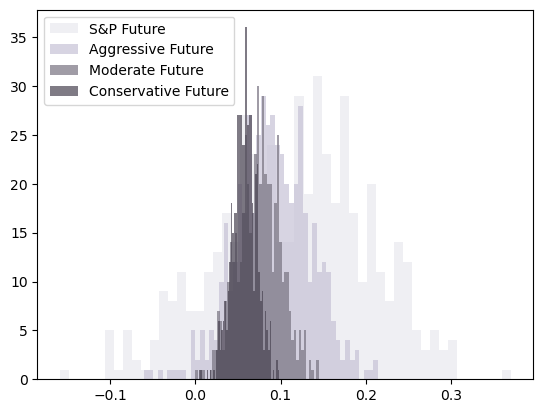

In [2446]:
plt.hist(future_returns['S&P Future'], bins=50, alpha=0.7, color='#e9e9ee')
plt.hist(future_returns['Aggressive Future'], bins=50, alpha=0.7, color='#c7c2d6')
plt.hist(future_returns['Moderate Future'], bins=50, alpha=0.7, color='#787380')
plt.hist(future_returns['Conservative Future'], bins=50, alpha=0.7, color='#494351')
plt.legend(['S&P Future', 'Aggressive Future', 'Moderate Future', 'Conservative Future'])

In [2447]:
statistics = {'Return Rates': ['S&P Future', 'Aggressive Future', 'Moderate Future', 'Conservative Future'],
            'Mean': [np.mean(future_returns['S&P Future']), np.mean(future_returns['Aggressive Future']), np.mean(future_returns['Moderate Future']), np.mean(future_returns['Conservative Future'])],
            'Standard Deviation': [np.std(future_returns['S&P Future']), np.std(future_returns['Aggressive Future']), np.std(future_returns['Moderate Future']), np.std(future_returns['Conservative Future'])],
             'Variance': [stat.variance(future_returns['S&P Future']), stat.variance(future_returns['Aggressive Future']), stat.variance(future_returns['Moderate Future']), stat.variance(future_returns['Conservative Future'])]}   
                                                                                                      
statistics_table = pd.DataFrame.from_dict(statistics).set_index('Return Rates')                      
display(statistics_table)

,Mean,Standard Deviation,Variance
Return Rates,,,
S&P Future,0.114,0.087,0.008
Aggressive Future,0.091,0.044,0.002
Moderate Future,0.074,0.025,0.001
Conservative Future,0.057,0.014,0.000


## A random walk through probability

The random walk theory claims that stock prices are not influenced by history, but rather a random walk that follows an upward slope. Additionally, the Black-Scholes/Merton equation explores the probability distribution of the markets in great depth, focusing on the correlation between brownian motion and the probability distrubtion found in finances.

I investigated the directions of change (derivatives) from 1928 to 2023, and found that the expected distribution resulted in 41 years with an increase in rate of return, and 52 years of decrease. Looking at the visual of my analysis, the stock market was positive for 70 of the 96 years surveyed, and negative for 26 of those years.

The goal of this retirement simulator is to simulate the same patterns found in the historical stock market to forecast the probable distribution of future returns. <br><br>

<img src="Images/StockPatterns.jpg" width="900" height="610">

### Sources:
[Random Walk](https://www.sciencedirect.com/science/article/pii/S2405473915000331) <br>
[Black-Scholes/Merton Equation](https://www.youtube.com/watch?v=A5w-dEgIU1M)

*I can calculate the motion of heavenly bodies, but not the madness of people.” — Sir Isaac Newton.*





In [2448]:
future_returns.head(10)

,S&P Future,Aggressive Future,Moderate Future,Conservative Future
0,0.071,0.056,0.055,0.071
1,-0.159,0.090,0.045,0.078
2,0.209,0.068,0.075,0.056
3,0.177,0.100,0.061,0.060
4,0.061,0.044,0.104,0.060
5,0.194,0.084,0.057,0.056
6,0.135,0.101,0.088,0.070
7,0.210,0.123,0.048,0.087
8,0.142,0.092,0.106,0.058
9,0.157,0.039,0.036,0.059


In [2449]:

#pulling the returns from the futures dataframe, preparation for the forecasting function
aggressive = list(future_returns['Aggressive Future'])
moderate = list(future_returns['Moderate Future'])
conservative = list(future_returns['Conservative Future'])



#based on the rate distrinbution patterns, the negative counter function is only used for the aggressive return rates
def negative_counter(list):
    neg_counter = 0
    for r in range(len(list)):
        if list[r] < 0:
            neg_counter += 1
    percent_negative = (neg_counter/len(list))*100
    return percent_negative

def positive_change_counter(list):
    pos_change_counter = 0
    for i in range(len(list)-1):
        if list[i] < list[i+1]:
            pos_change_counter += 1
    percent_pos_change = (pos_change_counter/len(list))*100
    return percent_pos_change

def retirement_forecast(investor, investment, years):
    sample_count = 0
    forecast_rates = []
    forecast_samples = {}
    #creating a sample that follows the same patterns of positive and negative change, as well as negative returns 
    while sample_count < 5:
        forecast_rates = random.sample(investor, years)
        negative = negative_counter(forecast_rates)
        positive_change = positive_change_counter(forecast_rates)
        if investor == conservative or investor == moderate:
            if positive_change >= 40 and positive_change <= 50:
                column_name = 'Sample ' + str(sample_count+1)
                forecast_samples[column_name] = forecast_rates
                sample_count += 1
        else:
            if negative > 10 and positive_change >= 40 and positive_change <= 50:
                column_name = 'Sample ' + str(sample_count+1)
                forecast_samples[column_name] = forecast_rates
                sample_count += 1

    #create dataframe from the dictionary
    forecast_df = pd.DataFrame(forecast_samples)
    #create  year column, starting with the current year and adding a year for each row
    forecast_df['Year'] = datetime.now().year + forecast_df.index
    forecast_df.set_index('Year', inplace=True)
    #pull in initial investment
    initial_investment = investment
    #create a new dataframe to hold the future value of the investment  
    future_value = pd.DataFrame()   
    for i in range(5):
        future_value['Sample ' + str(i+1)] = initial_investment*(1 + forecast_df['Sample ' + str(i+1)]).cumprod()
    future_value['Year'] = forecast_df.index
    future_value.set_index('Year', inplace=True)
    #create a plot of the future values of the investment
    fig = px.line(future_value, title=f'Future Value of ${initial_investment:,} Investment in Portfolio',
                labels={'value':'Value of Investment', 'Year':'Year'},
                width=900, height=500, markers=True)
    fig.show()

    #print the highest and lowest investment value for the final year, in addition to the average return rate
    final_year = future_value.index[-1]
    highest_value = future_value.iloc[-1].max()
    lowest_value = future_value.iloc[-1].min()
    average_value = (highest_value + lowest_value)/2
    return_forecast = (forecast_df.mean().mean())*100

    print(f'The highest projected value in {final_year} is: ${highest_value:,.0f}')
    print(f'The lowest projected value in {final_year} is: ${lowest_value:,.0f}')
    print(f'The average projected value in {final_year} is: ${average_value:,.0f}')
    print(f'The average return rate for the portfolio is: {return_forecast:.2f}%')

retirement_forecast(aggressive, 250000,30)




The highest projected value in 2053 is: $2,609,006
The lowest projected value in 2053 is: $1,755,121
The average projected value in 2053 is: $2,182,063
The average return rate for the portfolio is: 7.62%
